In [1]:
import requests # 웹 페이지 소스를 얻기 위한 패키지(기본 내장 패키지이다.)
from bs4 import BeautifulSoup # 웹 페이지 소스를 얻기 위한 패키지, 더 간단히 얻을 수 있다는 장점이 있다고 한다.
from datetime import datetime                                # (!pip install beautifulsoup4 으로 다운받을 수 있다.)
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지이다. (사이트가 늦게 켜지면 에러가 발생하기 때문)
import urllib.request #
from selenium.webdriver import Chrome
import json
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt

In [15]:
start_url  = 'http://www.youtube.com'
delay=3
browser = Chrome()
browser.implicitly_wait(delay)

browser.get(start_url)  
browser.maximize_window()

In [ ]:
[0].send_keys('테스터훈')

In [22]:
browser.find_elements_by_xpath('//input[@id="search"]')[0].click()

In [25]:
browser.find_elements_by_xpath('//*[@class="gstl_50 sbib_a"]/div[2]/input')

[<selenium.webdriver.remote.webelement.WebElement (session="ae5fef7464cb3aa4224e430f471a0ad1", element="0.2433534234172421-4")>]

In [11]:
browser.find_elements_by_xpath('//*[@class="gstl_50 sbib_a"]/div[2]/input')[0].send_keys(Keys.RETURN)

In [12]:
#크리에이터에 접근
browser.find_elements_by_xpath('//*[@class="yt-simple-endpoint style-scope ytd-channel-renderer"]/div[2]/h3/span')[0].click()

In [13]:
#동영상 클릭
browser.find_element_by_xpath('//*[@class="scrollable style-scope paper-tabs"]/paper-tab[2]').click()

In [14]:
body = browser.find_element_by_tag_name('body')#스크롤하기 위해 소스 추출

num_of_pagedowns = 20
#10번 밑으로 내리는 것
while num_of_pagedowns:
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(2)
    num_of_pagedowns -= 1

# URL추출

In [10]:
html0 = browser.page_source

In [11]:
html = BeautifulSoup(html0,'html.parser')

In [13]:
video_ls=html.find_all('ytd-grid-video-renderer',{'class':'style-scope ytd-grid-renderer'})

In [27]:
b = html.find('div',{'id':'items','class':'style-scope ytd-grid-renderer'})

In [29]:
len(b.find_all('ytd-grid-video-renderer',{'class':'style-scope ytd-grid-renderer'}))

450

In [32]:
tester_url = []
for i in range(len(video_ls)):
    url = start_url+video_ls[i].find('a',{'id':'thumbnail'})['href']
    tester_url.append(url)

# 테스터훈의 영상 정보 추출

In [85]:
browser.get(tester_url[2])

In [86]:
body = browser.find_element_by_tag_name('body')#스크롤하기 위해 소스 추출

num_of_pagedowns = 2
#10번 밑으로 내리는 것
while num_of_pagedowns:
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(2)
    num_of_pagedowns -= 1
    
time.sleep(2)

In [50]:
soup0 = browser.page_source

In [51]:
soup = BeautifulSoup(soup0,'html.parser')

In [52]:
info1 = soup.find('div',{'id':'info-contents'})

In [59]:
comment = soup.find('yt-formatted-string',{'class':'count-text style-scope ytd-comments-header-renderer'}).text

In [62]:
title = info1.find('h1',{'class':'title style-scope ytd-video-primary-info-renderer'}).text

In [66]:
view =info1.find('yt-view-count-renderer',{'class':'style-scope ytd-video-primary-info-renderer'}).find_all('span')[0].text

In [71]:
like = info1.find('div',{'id':'top-level-buttons'}).find_all('yt-formatted-string')[0].text

In [72]:
unlike = info1.find('div',{'id':'top-level-buttons'}).find_all('yt-formatted-string')[1].text

In [80]:
date = soup.find('span',{'class':'date style-scope ytd-video-secondary-info-renderer'}).text

In [ ]:
video_info = pd.DataFrame({'title':[],
                          'view':[],
                          'like':[],
                          'unlike':[],
                          'comment':[],
                          'date':[]})

In [96]:
for i in range(95,len(tester_url)):
    browser.get(tester_url[i])
    time.sleep(1.5)
    
    body = browser.find_element_by_tag_name('body')#스크롤하기 위해 소스 추출

    num_of_pagedowns = 2
    #10번 밑으로 내리는 것
    while num_of_pagedowns:
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(2)
        num_of_pagedowns -= 1

    time.sleep(2)
    
    soup0 = browser.page_source
    time.sleep(1.5)
    soup = BeautifulSoup(soup0,'html.parser')
    
    info1 = soup.find('div',{'id':'info-contents'})
    
    try:
        comment = soup.find('yt-formatted-string',{'class':'count-text style-scope ytd-comments-header-renderer'}).text
    except:
        comment = '댓글x'
    title = info1.find('h1',{'class':'title style-scope ytd-video-primary-info-renderer'}).text
    view =info1.find('yt-view-count-renderer',{'class':'style-scope ytd-video-primary-info-renderer'}).find_all('span')[0].text
    like = info1.find('div',{'id':'top-level-buttons'}).find_all('yt-formatted-string')[0].text
    unlike = info1.find('div',{'id':'top-level-buttons'}).find_all('yt-formatted-string')[1].text
    date = soup.find('span',{'class':'date style-scope ytd-video-secondary-info-renderer'}).text
    
    
    insert_data = pd.DataFrame({'title':[title],
                          'view':[view],
                          'like':[like],
                          'unlike':[unlike],
                          'comment':[comment],
                          'date':[date]})
    
    video_info = video_info.append(insert_data)
    
video_info.index = range(len(video_info))

In [89]:
video_info.index = range(len(video_info))

In [97]:
video_info

,title,view,like,unlike,comment,date
0,★스킬 한방=치명타+4타★ 이번 패치로 혼자서 3명 다 잡는 사기 챔피언이 되었다 ...,"조회수 109,701회",2.7천,97,댓글 289개,게시일: 2019. 5. 22.
1,처음 만난 래퍼와 모델이 소개팅을 한다면? [테스터훈 아바타소개팅],"조회수 83,081회",1.3천,39,댓글 211개,게시일: 2019. 5. 21.
2,★포탑 피해량 1위★ 무려 15데스하고도 게임을 승리하는 방법 ㅋㅋㅋ 어둠 레오나 ...,"조회수 180,736회",1.9천,176,댓글 312개,게시일: 2019. 5. 20.
3,놀이공원에 전과 10범 도둑이 등장했다..?! 계속되는 절도사건! [테스터훈] 플래...,"조회수 72,893회",2.2천,33,댓글 538개,게시일: 2019. 5. 19.
4,★정글링 200%★ Q만 맞추면 갱킹 100% 성공함 ㅋㅋㅋ 정글 모르가나 [테스터훈],"조회수 223,589회",2.8천,141,댓글 345개,게시일: 2019. 5. 18.
5,★생존력 5단계★ 오늘 나는 죽지 않기로 결심했다 ㅇㅎㄸ~ 좀비 스웨인 [테스터훈],"조회수 178,638회",2.1천,119,댓글 312개,게시일: 2019. 5. 17.
6,요시 근황,"조회수 91,149회",2.3천,19,댓글 416개,게시일: 2019. 5. 17.
7,★노양심 라인전★ ㅋㅋㅋㅋ 아리님 왜 화를 내고 그러세요?? 나선환 요릭 [테스터훈],"조회수 250,363회",2.5천,160,댓글 278개,게시일: 2019. 5. 17.
8,드디어 놀이공원 대박났습니다 ㅋㅋㅋㅋㅋ [테스터훈] 플래닛코스터,"조회수 95,073회",3.2천,41,댓글 285개,게시일: 2019. 5. 16.
9,★치명타 피해량 229%★ 극카운터 야스오를 참교육한다 ㅎㄷㄷ 인피니티 애쉬 [테...,"조회수 256,711회",3.6천,260,댓글 296개,게시일: 2019. 5. 16.


In [99]:
video_info.to_csv('영상정보_테스터훈.csv',index=False,encoding='utf8')

In [143]:
ttt = pd.read_csv('영상정보_테스터훈.csv',engine='python',encoding='utf8')

과연 유튜브 조회수는 게시한지 시간이 지날수록 즉, 올린지 꽤 된 영상의 조회수가 높을까?
- 이것부터 먼저 분석해야할 듯 

In [144]:
like_ls = []
view_ls = []
unlike_ls = []
comment_ls = []
date_ls=[]
for i in range(len(ttt)):
    if '천' in ttt['like'].iloc[i]:
        a = ''.join(re.findall('[0-9]',ttt['like'].iloc[i]))
        if len(a) == 2:
            b = a+'00'
        else:
            b = a+'000'
    elif '만' in ttt['like'].iloc[i]:
        b = ''.join(re.findall('[0-9]',ttt['like'].iloc[i])) + '000'
    else:
        b = ttt['like'].iloc[i]
    like_ls.append(b)
    
    if '천' in ttt['unlike'].iloc[i]:
        aa = ''.join(re.findall('[0-9]',ttt['unlike'].iloc[i]))
        if len(a) == 2:
            bb = aa+'00'
        else:
            bb = aa+'000'
    elif '만' in ttt['unlike'].iloc[i]:
        bb = ''.join(re.findall('[0-9]',ttt['unlike'].iloc[i])) + '000'
    else:
        bb = ttt['unlike'].iloc[i]
    unlike_ls.append(bb)
    
    view0 = ''.join(re.findall('[0-9]',ttt['view'].iloc[i]))
    view_ls.append(view0)
    
    comment0 = ''.join(re.findall('[0-9]',ttt['comment'].iloc[i]))
    comment_ls.append(comment0)
    
    date0 = ''.join(re.findall('[.0-9]',ttt['date'].iloc[i]))
    date_ls.append(date0[:-1])
    
ttt['like'] = like_ls
ttt['view'] = view_ls
ttt['comment'] = comment_ls
ttt['date']=date_ls
ttt['unlike'] = unlike_ls

In [133]:
ttt

,title,view,like,unlike,comment,date
0,★스킬 한방=치명타+4타★ 이번 패치로 혼자서 3명 다 잡는 사기 챔피언이 되었다 ...,109701,2700,97,289,2019.5.22
1,처음 만난 래퍼와 모델이 소개팅을 한다면? [테스터훈 아바타소개팅],83081,1300,39,211,2019.5.21
2,★포탑 피해량 1위★ 무려 15데스하고도 게임을 승리하는 방법 ㅋㅋㅋ 어둠 레오나 ...,180736,1900,176,312,2019.5.20
3,놀이공원에 전과 10범 도둑이 등장했다..?! 계속되는 절도사건! [테스터훈] 플래...,72893,2200,33,538,2019.5.19
4,★정글링 200%★ Q만 맞추면 갱킹 100% 성공함 ㅋㅋㅋ 정글 모르가나 [테스터훈],223589,2800,141,345,2019.5.18
5,★생존력 5단계★ 오늘 나는 죽지 않기로 결심했다 ㅇㅎㄸ~ 좀비 스웨인 [테스터훈],178638,2100,119,312,2019.5.17
6,요시 근황,91149,2300,19,416,2019.5.17
7,★노양심 라인전★ ㅋㅋㅋㅋ 아리님 왜 화를 내고 그러세요?? 나선환 요릭 [테스터훈],250363,2500,160,278,2019.5.17
8,드디어 놀이공원 대박났습니다 ㅋㅋㅋㅋㅋ [테스터훈] 플래닛코스터,95073,3200,41,285,2019.5.16
9,★치명타 피해량 229%★ 극카운터 야스오를 참교육한다 ㅎㄷㄷ 인피니티 애쉬 [테...,256711,3600,260,296,2019.5.16


# 날짜별로 조회수를 표준화하는 것은 좀 이후에

#가중치를 주기 위해서
1. 일주일씩 끊어서 조회수의 합을 구한다음 평균을 내준다(일주일마다의 영상 올린 갯수가 다르므로)
2. 주별 영상 조회수 차이를 구한다 총 45주면 주별 조회수 차이는 44개가 나올 것
3. 나온 44개의 수치들의 평균을 구한다.
4. 계산을 통해서 주별 평균적인 조회수차이를 구할 수 있으므로 해당 수치로 날짜가 달라도 어느정도 감안하고 그 차이를 알 수 있다.

#날짜별로 가중치를 주기 위해서
1. 조회수의 평균을 먼저 구함
2. 평균 조회수까지 걸리는 시간을 구함
3. 그것을 걸린 날짜로 나눔
4. 그럼 해당 유튜버의 일자별 조회수 증가량을 알 수 있음 (max가 정해져 있음 but 영상이라는 것이 다른 외생변수도 많을테지만 일반화를 위해서 해당 방법 처럼 구함)

In [23]:
ttt['view'] = ttt['view'].astype('float64')

In [26]:
ttt['view'].mean()

428012.9244444444

In [31]:
ttt[ttt['view']>=428012] #평균조회수에 도달하는데 30일 걸림 약 1일에 14000조회수 
#영상을 올린지 30일이 지난 영상은 지금의 조회수 - 14000*30을 해준다 
#약 280개의 영상이 평균 조회수보다 낮은 이유는?

,title,view,like,unlike,comment,date
37,현재 댓글에 달리고 있는 헬퍼 핵 논란 해명 하겠습니다 [테스터훈],522425.0,4700,234,2681,2019.4.23
57,[유튜버 최초] PC방 먹방은 이렇게 하는거지 3탄 (메뉴:연어덮밥삼겹살 정식) [...,465308.0,5400,163,919,2019.4.4
83,이게 뭐냐 웃음참기 레전드 [테스터훈],477114.0,5200,271,848,2019.3.8
95,뽀뽀 [테스터훈],494495.0,좋아요,싫어요,,2019.2.25
108,죄송합니다 그만 하겠습니다 [테스터훈],443347.0,11000,516,4788,2019.1.31
112,여자친구와 싸웠습니다 [테스터훈],431696.0,6100,413,1699,2019.1.27
120,정말 힘든 일이 생겼습니다 [테스터훈],683077.0,19000,413,6316,2019.1.16
125,카트라이더에 현질하면 생기는 일 [테스터훈 카트1],554193.0,4700,242,2660,2019.1.10
129,4년 전 대회 씹어먹던 템트리 지금 당장 다시 하세요 ★메타의 재발견★ 옛날 카직스...,443565.0,4300,203,912,2019.1.8
139,★사정거리 3500★ 궁극기 쓰면 딜러들 그냥 한방에 죽음 저격 케이틀린 [테스터훈],599592.0,4800,330,868,2018.12.28


# 상관분석

In [145]:
ttt2 = ttt[ttt['like']!='좋아요']

In [146]:
ttt2 = ttt2[ttt2['comment']!='']

In [147]:
ttt2['view'] = ttt2['view'].astype('float64')
ttt2['like'] = ttt2['like'].astype('float64')
ttt2['unlike'] = ttt2['unlike'].astype('float64')
ttt2['comment'] = ttt2['comment'].astype('float64')

In [148]:
ttt2[['view','like','comment']].corr()

,view,like,comment
view,1.000000,0.813429,0.341466
like,0.813429,1.000000,0.615822
comment,0.341466,0.615822,1.000000


### 좋아요 수와 댓글수/조회수는 높은 상관관계를 보인다. 댓글수와 조회수는 0.34의 상관관계를 보이지만 이정도면 준수한 편

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib

In [150]:
heat = ttt2[['view','like','comment']].corr()

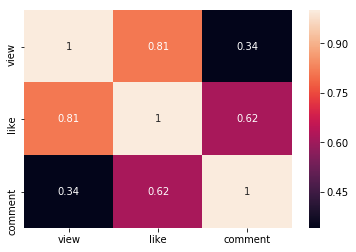

In [152]:
sns.heatmap(heat,annot=True)

# 텍스트 전처리 

<img src = 'ckonlpy.PNG'>

In [50]:
#한글 형태소 분석기인 konlpy사용 
#이때 konlpy에는 hannanum, kommoran, kkma, twitter이 있는데 해당 분석에서는 kkma사용
from konlpy.tag import Kkma
from konlpy.tag import Mecab
from konlpy.tag import Twitter
#apply lambda사용
from konlpy.tag import Komoran

리그오브레전드의 챔피언 이름을 사전으로 추가하는 과정이 필요할 듯 일단 생략,
https://cromboltz.tistory.com/18  
사전 수정 후 -> 아카이브 후 덮어쓰기

In [154]:
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

In [155]:
title_ls=[]
for i in range(len(ttt)):
    a = re.sub(emoji_pattern,'',ttt['title'].iloc[i])
    
    b = re.sub(han,'',a)
    
    title_ls.append(b)
    
ttt['title']=title_ls

In [45]:
twitter = Twitter()

C:\Users\tlsal\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [156]:
kkma = Kkma()

In [157]:
#영상제목 토큰화 하는 과정
noun_final = []
for text in range(len(ttt)):
    noun0=kkma.pos(ttt['title'].iloc[text])
    noun=[]
    for i,j in noun0:
        if j=='NNG':
            if i == '테스터' or i == '훈':
                pass
            else:
                noun.append(i)
    noun_final.append(noun)
ttt['token'] = noun_final

In [158]:
#토큰화 작업을 거친 뒤에 단어가 하나인 것은 제외하기
noun_ls = []
for i in range(len(ttt)):
    noun_ls0=[]
    for j in range(len(ttt['token'].iloc[i])):
        if len(ttt['token'].iloc[i][j]) == 1:
            pass
        else:
            noun_ls0.append(ttt['token'].iloc[i][j])
    noun_ls.append(list(set(noun_ls0))) #중복제거

In [159]:
ttt['token2'] = noun_ls

In [160]:
ttt

,title,view,like,unlike,comment,date,token,token2
0,★스킬 한방=치명타+4타★ 이번 패치로 혼자서 3명 다 잡는 사기 챔피언이 되었다 ...,109701,2700,97,289,2019.5.22,"[스킬, 한방, 치명타, 이번, 패치, 혼자, 사기, 챔피언, 학살, 마스터]","[챔피언, 마스터, 혼자, 치명타, 한방, 사기, 이번, 학살, 스킬, 패치]"
1,처음 만난 래퍼와 모델이 소개팅을 한다면 [테스터훈 아바타소개팅],83081,1300,39,211,2019.5.21,"[처음, 만난, 래퍼, 모델, 소개팅, 소개팅]","[래퍼, 소개팅, 처음, 모델, 만난]"
2,★포탑 피해량 1위★ 무려 15데스하고도 게임을 승리하는 방법 어둠 레오나 [테스터훈],180736,1900,176,312,2019.5.20,"[포탑, 피해, 량, 도, 게임, 승리, 방법, 어둠, 레, 오나]","[승리, 게임, 피해, 오나, 방법, 어둠, 포탑]"
3,놀이공원에 전과 10범 도둑이 등장했다 계속되는 절도사건 [테스터훈] 플래닛코스터,72893,2200,33,538,2019.5.19,"[놀이, 공원, 전과, 도둑, 등장, 계속, 절도, 사건, 코스터]","[계속, 전과, 사건, 등장, 절도, 놀이, 공원, 코스터, 도둑]"
4,★정글링 200%★ Q만 맞추면 갱킹 100% 성공함 정글 모르가나 [테스터훈],223589,2800,141,345,2019.5.18,"[정, 글, 링, 갱, 킹, 성, 공함, 정글, 모, 르]","[정글, 공함]"
5,★생존력 5단계★ 오늘 나는 죽지 않기로 결심했다 좀비 스웨인 [테스터훈],178638,2100,119,312,2019.5.17,"[생존력, 단계, 오늘, 결심, 비]","[오늘, 결심, 생존력, 단계]"
6,요시 근황,91149,2300,19,416,2019.5.17,"[요, 시, 근황]",[근황]
7,★노양심 라인전★ 아리님 왜 화를 내고 그러세요 나선환 요릭 [테스터훈],250363,2500,160,278,2019.5.17,"[노, 양심, 라인, 전, 아리, 화, 환, 요]","[양심, 라인, 아리]"
8,드디어 놀이공원 대박났습니다 [테스터훈] 플래닛코스터,95073,3200,41,285,2019.5.16,"[놀이, 공원, 대박, 코스터]","[공원, 코스터, 대박, 놀이]"
9,★치명타 피해량 229%★ 극카운터 야스오를 참교육한다 인피니티 애쉬 [테스터훈],256711,3600,260,296,2019.5.16,"[치명타, 피해, 량, 극, 카운터, 야스오, 참교육, 인, 티, 애, 쉬]","[피해, 카운터, 참교육, 야스오, 치명타]"


# 단어별 조회수

In [161]:
token_df = pd.DataFrame({'token':[]})
for i in range(len(ttt)):
    insert_data = pd.DataFrame({'token':ttt['token2'].iloc[i]})
    insert_data['view'] = ttt['view'].iloc[i]
    
    token_df = token_df.append(insert_data)

C:\Users\tlsal\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [162]:
token_df['view'] = token_df['view'].astype('float64')

In [163]:
token_df2 = token_df.groupby('token')['view'].sum().reset_index()

In [164]:
token_df2['count'] = token_df.groupby(['token']).count().reset_index()['view'].tolist()

In [165]:
view_count = []
for i in range(len(token_df2)):
    a = token_df2['view'].iloc[i]/token_df2['count'].iloc[i]
    view_count.append(a)
token_df2['view_count'] = view_count

In [167]:
token_df2.sort_values(by='count',ascending=False).head(15)

,token,view,count,view_count
751,피해,16307623.0,37,440746.567568
29,게임,7306960.0,28,260962.857143
643,체력,11669583.0,27,432206.777778
766,한방,12318016.0,24,513250.666667
638,챔피언,9738004.0,21,463714.476190
76,궁극,7559001.0,20,377950.050000
397,스킬,7362265.0,17,433074.411765
451,애기,6620089.0,16,413755.562500
17,강화,7491470.0,16,468216.875000
54,공격력,8148048.0,16,509253.000000


In [94]:
token_df2.sort_values(by='view',ascending=False).head(20)

,token,view,count,view_count
751,피해,16307623.0,37,4.407466e+05
766,한방,12318016.0,24,5.132507e+05
643,체력,11669583.0,27,4.322068e+05
168,떡볶이,11126892.0,8,1.390862e+06
123,단돈,10201726.0,7,1.457389e+06
762,한국,9858955.0,5,1.971791e+06
638,챔피언,9738004.0,21,4.637145e+05
22,거지,9300000.0,11,8.454545e+05
54,공격력,8148048.0,16,5.092530e+05
76,궁극,7559001.0,20,3.779500e+05


In [95]:
token_df2.sort_values(by='view').head(20)

,token,view,count,view_count
635,채널,66966.0,1,66966.0
680,커플,66966.0,1,66966.0
591,제야,70937.0,1,70937.0
372,소녀,70937.0,1,70937.0
775,행사,70937.0,1,70937.0
198,막자,72116.0,1,72116.0
578,절도,72893.0,1,72893.0
310,사건,72893.0,1,72893.0
39,계속,72893.0,1,72893.0
568,전과,72893.0,1,72893.0


In [96]:
token_df2.sort_values(by='view_count',ascending=False).head(15)

,token,view,count,view_count
50,곰팡이,2001860.0,1,2.001860e+06
733,평점,2001860.0,1,2.001860e+06
762,한국,9858955.0,5,1.971791e+06
498,요리,1910208.0,1,1.910208e+06
685,코스,1910208.0,1,1.910208e+06
184,로이,1837853.0,1,1.837853e+06
316,사비,1837853.0,1,1.837853e+06
627,짜장면,1781393.0,1,1.781393e+06
510,월드컵,1763831.0,1,1.763831e+06
484,예언,1763831.0,1,1.763831e+06


In [97]:
token_df2.sort_values(by='view_count').head(15)

,token,view,count,view_count
680,커플,66966.0,1,66966.0
635,채널,66966.0,1,66966.0
775,행사,70937.0,1,70937.0
372,소녀,70937.0,1,70937.0
591,제야,70937.0,1,70937.0
198,막자,72116.0,1,72116.0
39,계속,72893.0,1,72893.0
568,전과,72893.0,1,72893.0
578,절도,72893.0,1,72893.0
310,사건,72893.0,1,72893.0


# 키워드별 좋아요 수

In [99]:
token_df = pd.DataFrame({'token':[]})
for i in range(len(ttt)):
    insert_data = pd.DataFrame({'token':ttt['token2'].iloc[i]})
    insert_data['like'] = ttt['like'].iloc[i]
    
    token_df = token_df.append(insert_data)

C:\Users\tlsal\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [107]:
token_df = token_df[token_df['like']!='좋아요']

In [108]:
token_df['like'] = token_df['like'].astype('float64')

In [110]:
token_df2 = token_df.groupby('token')['like'].sum().reset_index()

In [111]:
token_df2['count'] = token_df.groupby(['token']).count().reset_index()['like'].tolist()

In [112]:
view_count = []
for i in range(len(token_df2)):
    a = token_df2['like'].iloc[i]/token_df2['count'].iloc[i]
    view_count.append(a)
token_df2['like_count'] = view_count

In [113]:
token_df2.sort_values(by='like_count',ascending=False).head(15)

,token,like,count,like_count
30,게임기,31000.0,1,31000.000000
320,사장님,31000.0,1,31000.000000
103,난이,23000.0,1,23000.000000
314,사비,22000.0,1,22000.000000
183,로이,22000.0,1,22000.000000
536,인내,18000.0,1,18000.000000
759,한국,83700.0,5,16740.000000
167,떡볶이,133300.0,8,16662.500000
683,코스,16000.0,1,16000.000000
496,요리,16000.0,1,16000.000000


In [114]:
token_df2.sort_values(by='like_count').head(15)

,token,like,count,like_count
197,막자,999.0,1,999.0
31,게장,1000.0,1,1000.0
432,아레나,1000.0,1,1000.0
435,아시아,1000.0,1,1000.0
548,자리,1000.0,1,1000.0
6,간장,1000.0,1,1000.0
306,빵집,1000.0,1,1000.0
594,종류,1000.0,1,1000.0
24,건물,1000.0,1,1000.0
633,채널,1100.0,1,1100.0


# 키워드별 댓글 수